<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/p_189_p_196.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**chapter 6. 학습 관련 기술들**

In [ ]:
# 다룰 주제: 1) 가중치 매개변수의 최적값을 탐색하는 최적화 방법, 가중치 매개변수 초깃값,
# 하이퍼파라미터 설정 방법 등 모두가 신경망 학습에서 중요한 주제.

# 2) 오버피팅의 대응책인 가중치 감소와 드롭 아웃 등의 정규화 방법도 간략히 설명하고 구현.
# 3) 최근 많은 연구에서 사용하는 배치 정규화.

# 최적의 매개변수 값을 찾는 단서로 매개변수의 기울기(미분)을 이용.
# 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수 값을 갱신하는 일을 몇 번이고, 반복해서 점점 최적의 값을
# 다가갔습니다. 이것이 확률적 경사 하강버버(SGD).

In [ ]:
# SGD
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

# update(params, gards) 메서드: SGD 과정에서 반복해서 불립니다.
# 인수: params, grads 딕셔너리 변수
# params['W1'], grads['W1]: 가중치 매개변수와 기울기를 저장.

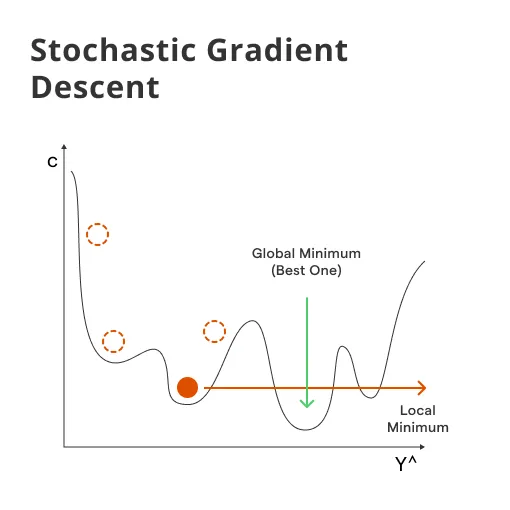

In [ ]:
# SG의 단점
# SGD는 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있습니다.

# 심하게 굽이진 움직임: 상당히 비효율적인 움직임.
# 단점: 비등방성 함수(방향에 따라 성질, 즉 여기에서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적이라는 것.

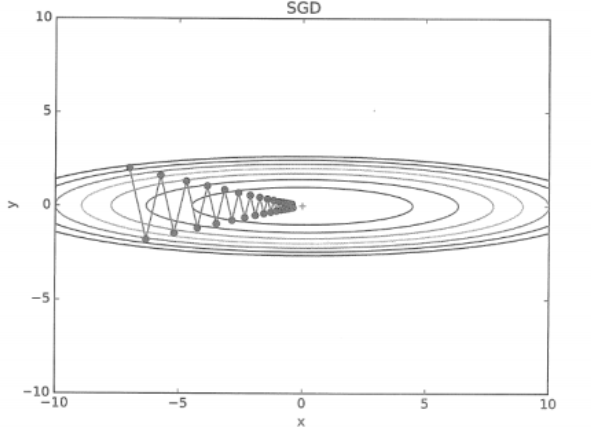

**모멘텀**

In [ ]:
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr=lr
    self.momentum=momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

    for key in params.keys():
      self.v[key]=self.momentum * self.v[key] - self.lr*grads[key]
      params[key]+=self.v[key]

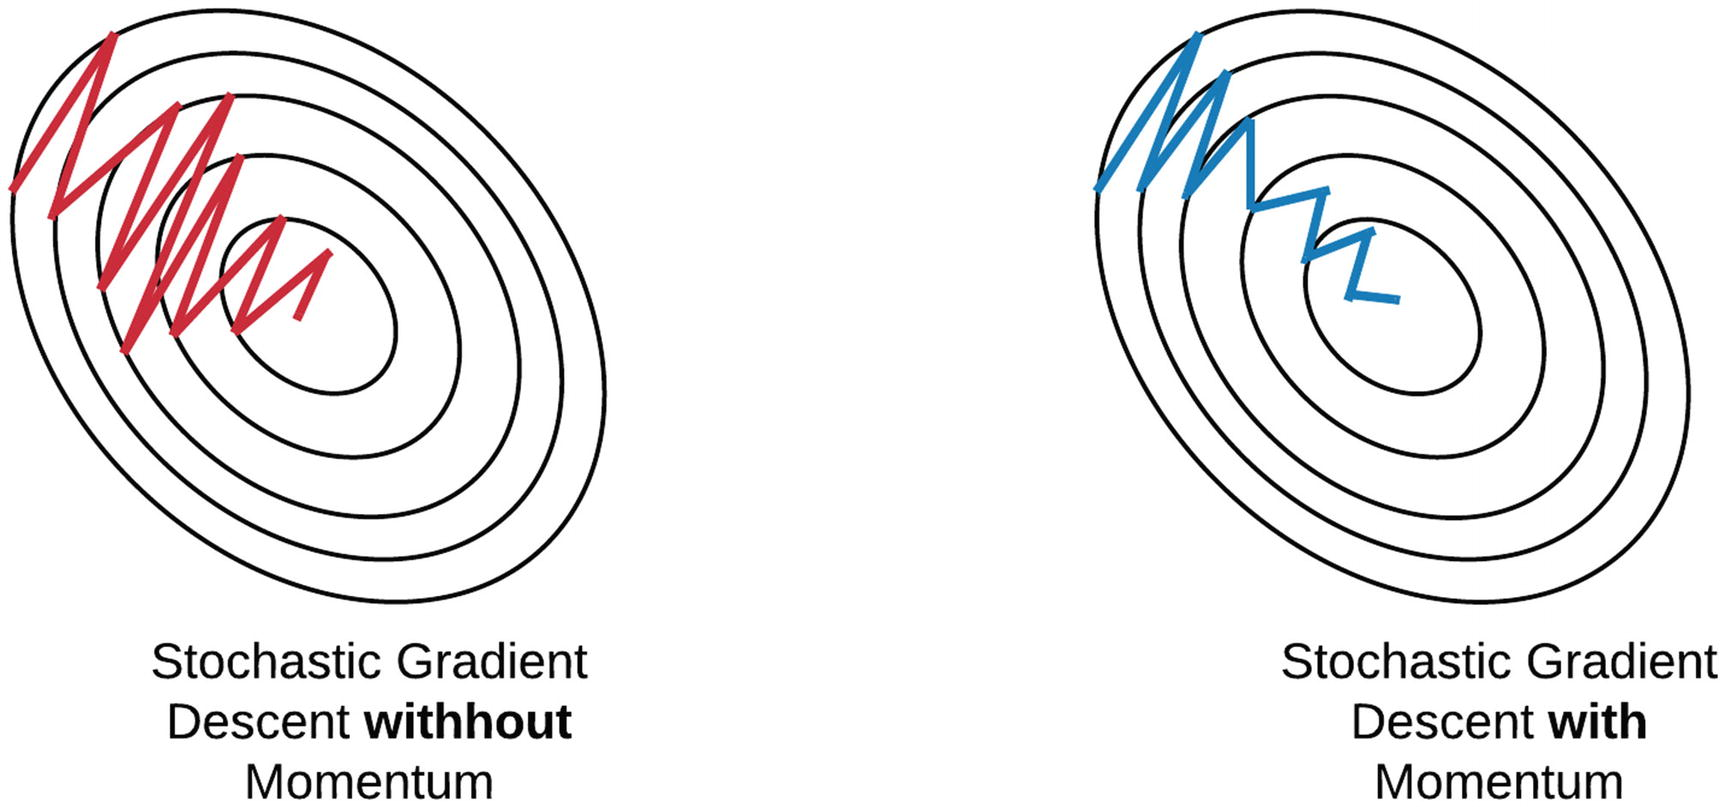

In [ ]:
# 모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯 움직입니다.
# SGD와 비교하면, '지그재그 정도'가 덜한 것을 알 수 있다.

# y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 y축의 방향의 속도는 안정적이지 않습니다.
# 전체적으로 SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어듭니다.